# Import Required Libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import nltk


# Load Dataset

In [3]:
df=pd.read_csv("drugsComTrain_raw.csv")

In [4]:
df.head()


,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


## Making stopwords list in stopwords variable 

In [5]:
stopwords=nltk.corpus.stopwords.words('english')
len(stopwords[:])

179

Making cleaned review column to make list of sentences of the column review

In [6]:
df["cleaned_review"]=df["review"].apply(lambda x:x.split())
df["cleaned_review"]

0         ["It, has, no, side, effect,, I, take, it, in,...
1         ["My, son, is, halfway, through, his, fourth, ...
2         ["I, used, to, take, another, oral, contracept...
3         ["This, is, my, first, time, using, any, form,...
4         ["Suboxone, has, completely, turned, my, life,...
                                ...                        
161292    ["I, wrote, my, first, report, in, Mid-October...
161293    ["I, was, given, this, in, IV, before, surgey....
161294    ["Limited, improvement, after, 4, months,, dev...
161295    ["I&#039;ve, been, on, thyroid, medication, 49...
161296    ["I&#039;ve, had, chronic, constipation, all, ...
Name: cleaned_review, Length: 161297, dtype: object

    ## removing stop words from sentences lists in cleaned review column

In [7]:
def remove_sw(ls):
    l=[word for word in ls if word not in stopwords]
    return l
df["cleaned_review"]=df["cleaned_review"].apply(lambda x:remove_sw(x))
df.tail()

,uniqueID,drugName,condition,review,rating,date,usefulCount,cleaned_review
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10,31-May-15,125,"[""I, wrote, first, report, Mid-October, 2014.,..."
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1,1-Nov-11,34,"[""I, given, IV, surgey., I, immediately, becam..."
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2,15-Mar-14,35,"[""Limited, improvement, 4, months,, developed,..."
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10,19-Sep-15,79,"[""I&#039;ve, thyroid, medication, 49, years,, ..."
161296,215220,Lubiprostone,"Constipation, Chronic","""I&#039;ve had chronic constipation all my adu...",9,13-Dec-14,116,"[""I&#039;ve, chronic, constipation, adult, lif..."


## Some words in the lists are "I&#039;ve so we have to remove them
    # also some of the first words start with (") so we have to remove it

In [8]:
def remove(ls):
    l=[word for word in ls if word!="\"I&#039;ve"]
    return l
df["cleaned_review"]=df["cleaned_review"].apply(lambda x:remove(x))
def firstword(sentence):
    if sentence[0][0]=='\"':
        s=sentence[0][1:]
        sentence[0]=s
        return sentence
    else:
        return sentence
    
df["cleaned_review"]=df["cleaned_review"].apply(lambda x:firstword(x))

In [8]:
df.tail()

,uniqueID,drugName,condition,review,rating,date,usefulCount,cleaned_review
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10,31-May-15,125,"[I, wrote, first, report, Mid-October, 2014., ..."
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1,1-Nov-11,34,"[I, given, IV, surgey., I, immediately, became..."
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2,15-Mar-14,35,"[Limited, improvement, 4, months,, developed, ..."
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10,19-Sep-15,79,"[thyroid, medication, 49, years,, I, spent, fi..."
161296,215220,Lubiprostone,"Constipation, Chronic","""I&#039;ve had chronic constipation all my adu...",9,13-Dec-14,116,"[chronic, constipation, adult, life., Tried, L..."


## Now again remove stop words as some words are now formed after doing above process

In [9]:
def remove_sw(ls):
    l=[word for word in ls if word not in stopwords]
    return l
df["cleaned_review"]=df["cleaned_review"].apply(lambda x:remove_sw(x))
df.tail()

,uniqueID,drugName,condition,review,rating,date,usefulCount,cleaned_review
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10,31-May-15,125,"[I, wrote, first, report, Mid-October, 2014., ..."
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1,1-Nov-11,34,"[I, given, IV, surgey., I, immediately, became..."
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2,15-Mar-14,35,"[Limited, improvement, 4, months,, developed, ..."
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10,19-Sep-15,79,"[thyroid, medication, 49, years,, I, spent, fi..."
161296,215220,Lubiprostone,"Constipation, Chronic","""I&#039;ve had chronic constipation all my adu...",9,13-Dec-14,116,"[chronic, constipation, adult, life., Tried, L..."


In [10]:
df.drop(['review'], axis = 1, inplace=True)

In [11]:
df.tail()

,uniqueID,drugName,condition,rating,date,usefulCount,cleaned_review
161292,191035,Campral,Alcohol Dependence,10,31-May-15,125,"[I, wrote, first, report, Mid-October, 2014., ..."
161293,127085,Metoclopramide,Nausea/Vomiting,1,1-Nov-11,34,"[I, given, IV, surgey., I, immediately, became..."
161294,187382,Orencia,Rheumatoid Arthritis,2,15-Mar-14,35,"[Limited, improvement, 4, months,, developed, ..."
161295,47128,Thyroid desiccated,Underactive Thyroid,10,19-Sep-15,79,"[thyroid, medication, 49, years,, I, spent, fi..."
161296,215220,Lubiprostone,"Constipation, Chronic",9,13-Dec-14,116,"[chronic, constipation, adult, life., Tried, L..."


In [12]:
df.describe

<bound method NDFrame.describe of         uniqueID                  drugName                     condition  \
0         206461                 Valsartan  Left Ventricular Dysfunction   
1          95260                Guanfacine                          ADHD   
2          92703                    Lybrel                 Birth Control   
3         138000                Ortho Evra                 Birth Control   
4          35696  Buprenorphine / naloxone             Opiate Dependence   
...          ...                       ...                           ...   
161292    191035                   Campral            Alcohol Dependence   
161293    127085            Metoclopramide               Nausea/Vomiting   
161294    187382                   Orencia          Rheumatoid Arthritis   
161295     47128        Thyroid desiccated           Underactive Thyroid   
161296    215220              Lubiprostone         Constipation, Chronic   

        rating       date  usefulCount  \
0          

In [13]:
df.count

<bound method DataFrame.count of         uniqueID                  drugName                     condition  \
0         206461                 Valsartan  Left Ventricular Dysfunction   
1          95260                Guanfacine                          ADHD   
2          92703                    Lybrel                 Birth Control   
3         138000                Ortho Evra                 Birth Control   
4          35696  Buprenorphine / naloxone             Opiate Dependence   
...          ...                       ...                           ...   
161292    191035                   Campral            Alcohol Dependence   
161293    127085            Metoclopramide               Nausea/Vomiting   
161294    187382                   Orencia          Rheumatoid Arthritis   
161295     47128        Thyroid desiccated           Underactive Thyroid   
161296    215220              Lubiprostone         Constipation, Chronic   

        rating       date  usefulCount  \
0           

In [14]:
# taking out information from the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   uniqueID        161297 non-null  int64 
 1   drugName        161297 non-null  object
 2   condition       160398 non-null  object
 3   rating          161297 non-null  int64 
 4   date            161297 non-null  object
 5   usefulCount     161297 non-null  int64 
 6   cleaned_review  161297 non-null  object
dtypes: int64(3), object(4)
memory usage: 8.6+ MB


In [16]:
# checking if the data contains any NULL values

df.isnull().any()

uniqueID          False
drugName          False
condition          True
rating            False
date              False
usefulCount       False
cleaned_review    False
dtype: bool

# DATA VISUALIZATION

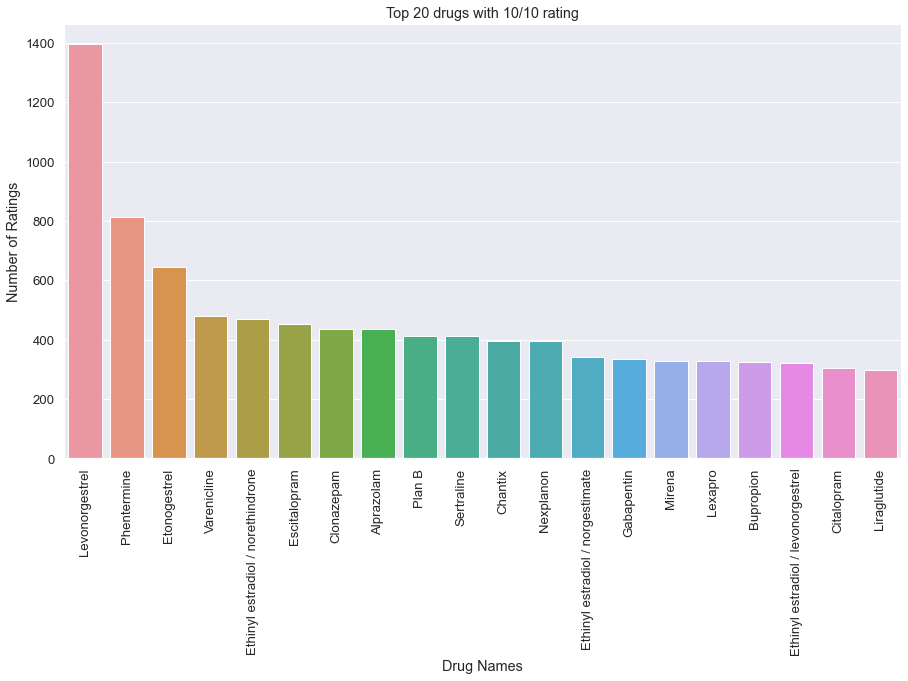

In [22]:
# This barplot shows the top 20 drugs with the 10/10 rating

# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(df.loc[df.rating == 10, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20])

sns_rating.set_title('Top 20 drugs with 10/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

C:\Users\AMAN SHRIVASTAVA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AMAN SHRIVASTAVA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Rating')

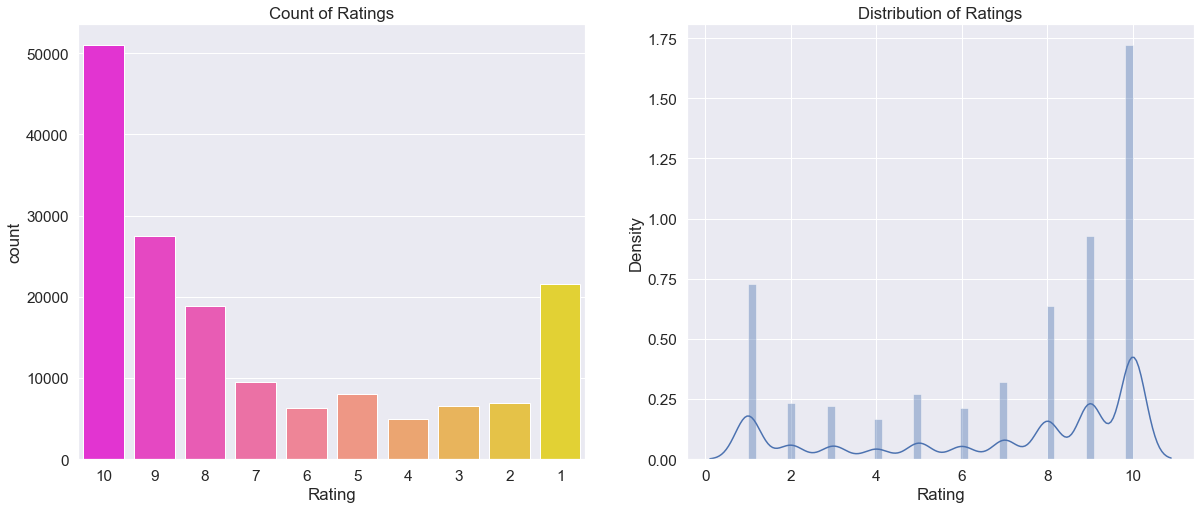

In [25]:
# A countplot of the ratings so we can see the distribution of the ratings
plt.rcParams['figure.figsize'] = [20,8]
sns.set(font_scale = 1.4, style = 'darkgrid')
fig, ax = plt.subplots(1, 2)

sns_1 = sns.countplot(df['rating'], palette = 'spring', order = list(range(10, 0, -1)), ax = ax[0])
sns_2 = sns.distplot(df['rating'], ax = ax[1])
sns_1.set_title('Count of Ratings')
sns_1.set_xlabel("Rating")

sns_2.set_title('Distribution of Ratings')
sns_2.set_xlabel("Rating")

* The shows a distribution plot on the right hand side and a bar graph of the same on the left hand side. This shows the distribution of the ratings from 1 to 10 in the data set.

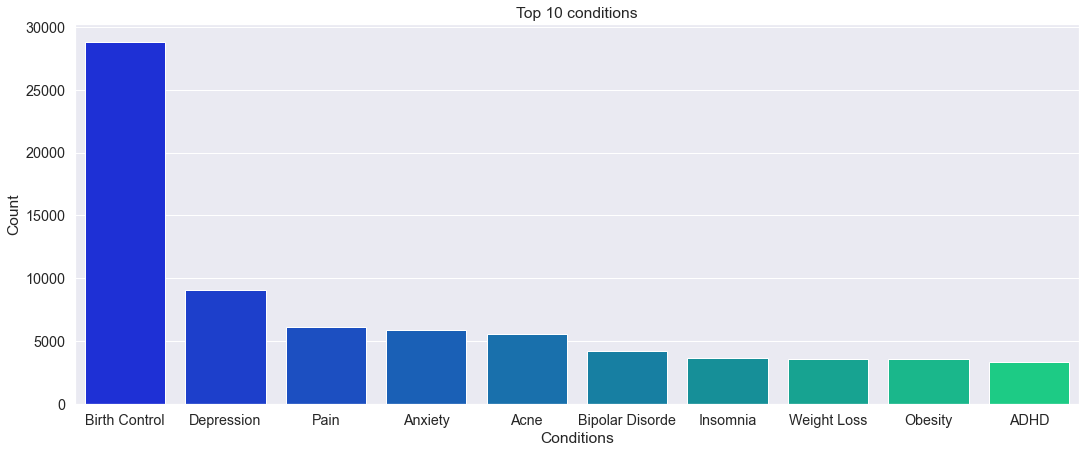

In [26]:
# This barplot show the top 10 conditions the people are suffering.
cond = dict(df['condition'].value_counts())
top_condition = list(cond.keys())[0:10]
values = list(cond.values())[0:10]
sns.set(style = 'darkgrid', font_scale = 1.3)
plt.rcParams['figure.figsize'] = [18, 7]

sns_ = sns.barplot(x = top_condition, y = values, palette = 'winter')
sns_.set_title("Top 10 conditions")
sns_.set_xlabel("Conditions")
sns_.set_ylabel("Count");

* The is a bar graph which exhibits the top 10 conditions the people are suffering from. In this data set 'Birth Control' is the most prominent condition by a very big margin followed by Depression and pain.

In [27]:
# feature engineering 
# let's make a new column review sentiment 

df.loc[(df['rating'] >= 5), 'Review_Sentiment'] = 1
df.loc[(df['rating'] < 5), 'Review_Sentiment'] = 0

df['Review_Sentiment'].value_counts()

1.0    121222
0.0     40075
Name: Review_Sentiment, dtype: int64

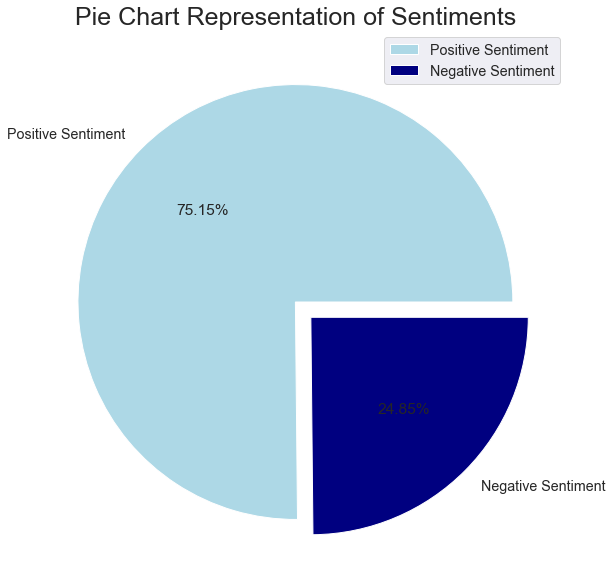

In [28]:
# a pie chart to represent the sentiments of the patients

size = [121222,40075 ]
colors = ['lightblue', 'navy']
labels = "Positive Sentiment","Negative Sentiment"
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, explode = explode, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Sentiments', fontsize = 25)
plt.legend()
plt.show()

## checking whether column is tokenised or not

In [18]:
l=df["cleaned_review"][0]
l

['It',
 'side',
 'effect,',
 'I',
 'take',
 'combination',
 'Bystolic',
 '5',
 'Mg',
 'Fish',
 'Oil"']

# STEM SENTENCE FUNCTION

In [19]:
from nltk.stem import PorterStemmer
porter=PorterStemmer()

In [20]:
def stemsentence(token_words):
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
    return stem_sentence
df["cleaned_review"]=df["cleaned_review"].apply(lambda x:stemsentence(x))


In [26]:
df["cleaned_review"][9000]

['fibromyalgia',
 '14',
 'years.',
 'I',
 'prescrib',
 'gabapentin',
 'within',
 'day',
 'I',
 'horrifi',
 'headach',
 'felt',
 'like',
 'brain',
 'go',
 'explode.',
 'I',
 'issu',
 'lyrica,',
 'cymbalta,',
 'savella',
 'amitryptiline.',
 'mayb',
 'brain',
 'chemistri',
 'doesn&#039;t',
 'like',
 'alter',
 'type',
 'med?',
 'I',
 'know',
 'reaction',
 'scare',
 'badli',
 'medic',
 'I',
 'use',
 'fibromyalgia',
 'tramadol.',
 'fortun',
 'keep',
 'edg',
 'pain',
 'I',
 'work',
 'full',
 'time.',
 'If',
 'would',
 'work',
 'soul',
 'crush',
 'fatigue!',
 ':-)"']

In [24]:
df["cleaned_review"][1]

['My',
 'son',
 'halfway',
 'fourth',
 'week',
 'intuniv.',
 'We',
 'becam',
 'concern',
 'began',
 'last',
 'week,',
 'start',
 'take',
 'highest',
 'dose',
 'on.',
 'for',
 'two',
 'days,',
 'could',
 'hardli',
 'get',
 'bed,',
 'cranky,',
 'slept',
 'nearli',
 '8',
 'hour',
 'drive',
 'home',
 'school',
 'vacat',
 '(veri',
 'unusu',
 'him.)',
 'I',
 'call',
 'doctor',
 'monday',
 'morn',
 'said',
 'stick',
 'days.',
 'see',
 'school,',
 'get',
 'morning.',
 'the',
 'last',
 'two',
 'day',
 'problem',
 'free.',
 'He',
 'much',
 'agreeabl',
 'ever.',
 'He',
 'less',
 'emot',
 '(a',
 'good',
 'thing),',
 'less',
 'cranky.',
 'He',
 'rememb',
 'thing',
 'should.',
 'overal',
 'behavior',
 'better.',
 'We',
 'tri',
 'mani',
 'differ',
 'medic',
 'far',
 'effective."']

stemming done in cleaned review column

     #Below cell is just to remove punctuations from tokenize sentences

In [27]:
punctuations=['.','?','!',':',',',';']

def remove_punctuations(tokenize_sentence):
    for word in tokenize_sentence:
        if word in punctuations:
            tokenize_sentence.remove(word)
    return tokenize_sentence
df["cleaned_review"]=df["cleaned_review"].apply(lambda x:remove_punctuations(x))

 ## Now as lemmatization and stemming is done we shall look upon tf/idf  vectorizer 